In [2]:
import keras
from keras.models import Sequential  # Import Sequential from keras.models
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.datasets import mnist
%matplotlib inline

In [3]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 4s 0us/step


In [4]:
img_rows, img_cols = 28, 28 

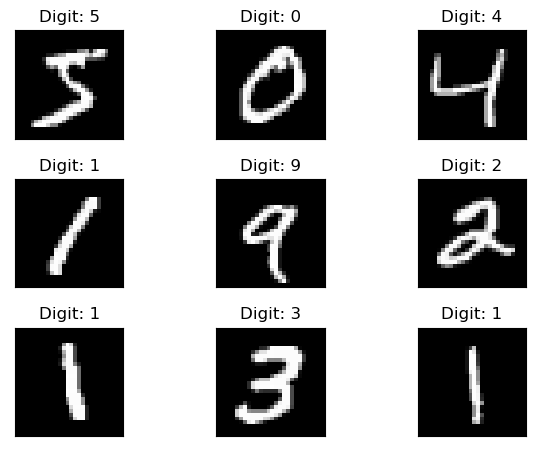

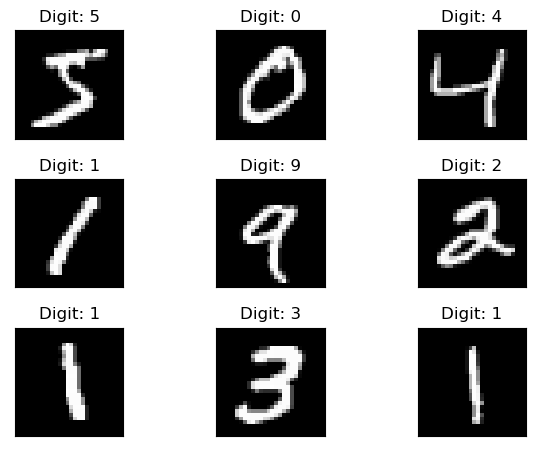

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [6]:
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [7]:
num_category = 10
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [8]:
##model building
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 79s 164ms/step - loss: 2.2910 - accuracy: 0.1269 - val_loss: 2.2671 - val_accuracy: 0.3400
Epoch 2/10
469/469 [==============================] - 77s 163ms/step - loss: 2.2537 - accuracy: 0.2302 - val_loss: 2.2222 - val_accuracy: 0.4923
Epoch 3/10
469/469 [==============================] - 76s 163ms/step - loss: 2.2063 - accuracy: 0.3176 - val_loss: 2.1615 - val_accuracy: 0.5636
Epoch 4/10
469/469 [==============================] - 78s 166ms/step - loss: 2.1407 - accuracy: 0.3851 - val_loss: 2.0777 - val_accuracy: 0.6009
Epoch 5/10
469/469 [==============================] - 73s 157ms/step - loss: 2.0527 - accuracy: 0.4445 - val_loss: 1.9640 - val_accuracy: 0.6423
Epoch 6/10
469/469 [==============================] - 73s 156ms/step - loss: 1.9352 - accuracy: 0.4981 - val_loss: 1.8151 - val_accuracy: 0.6915
Epoch 7/10
469/469 [==============================] - 76s 161ms/step - loss: 1.7908 - accuracy: 0.5451 - val_loss: 1.6349 - val_ac

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 1.0816175937652588
Test accuracy: 0.7993999719619751


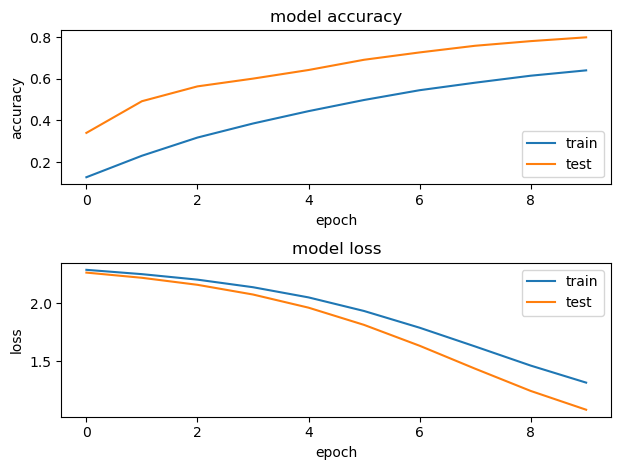

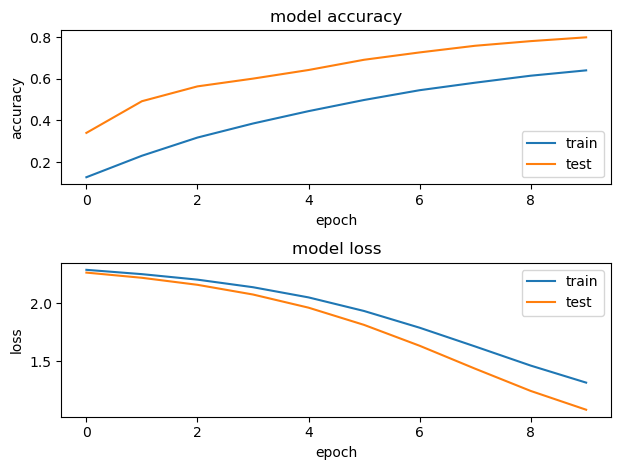

In [12]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig